In [1]:
import cv2
import numpy as np
import imutils
import matplotlib.pyplot as plt
from PIL import Image
from PIL import ImageFont
from PIL import ImageDraw

In [2]:
No_of_pills = str(len('123456789101')) 

In [3]:
No_of_pills

'12'

In [4]:
no_of_pills_1 = int(No_of_pills)

In [5]:
img = cv2.imread(r'D:\Woxsen\Defect Detection\9.jpg') 
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

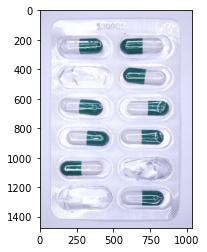

In [6]:
plt.imshow(img)

In [7]:
img = np.array(img, dtype=np.uint8)

In [8]:
fx = fy = int(200.0 / img.shape[0])

In [9]:
dim = (100, int(img.shape[1] * fx))

In [10]:
resized = cv2.resize(img, dim, fx = 0.5,fy=0.5)

In [11]:
blur = cv2.GaussianBlur(resized,(7,7),0)

In [12]:
roi_hsv = cv2.cvtColor(blur, cv2.COLOR_RGB2HSV)

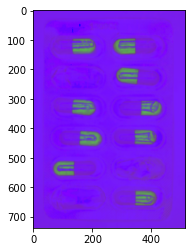

In [13]:
plt.imshow(roi_hsv)

In [14]:
h, s, v = cv2.split(roi_hsv)
hsv_image = cv2.merge([h, s, v])

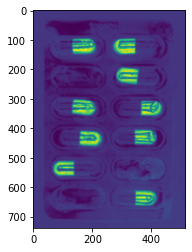

In [15]:
plt.imshow(s)

In [16]:

imgOTSU = cv2.threshold(s, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

In [17]:
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (19, 19),(9,9))


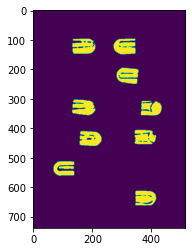

In [18]:
plt.imshow(imgOTSU[1])

In [19]:
fgmask = cv2.morphologyEx(imgOTSU[1], cv2.MORPH_CLOSE, kernel)


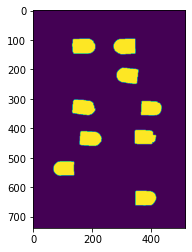

In [20]:
plt.imshow(fgmask)

In [21]:
PillsContours, hierarchy = cv2.findContours(fgmask.copy(), cv2.RETR_CCOMP, cv2.CHAIN_APPROX_SIMPLE)


In [22]:
print ('Number of pills: ', len(PillsContours))


Number of pills:  9


In [23]:
Detected_Pills = str(len(PillsContours))

In [24]:
Detected_Pills

'9'

In [25]:
Detected_pills_1 = int(Detected_Pills)

In [26]:
Defected_pills = no_of_pills_1 - Detected_pills_1

In [27]:
Defected_pills

3